# Condiciones de la asignación principal
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.



# Cargar los datos

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time as timer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [75]:
contract=pd.read_csv('datasets/final_provider/contract.csv')
personal=pd.read_csv('datasets/final_provider/personal.csv')
internet=pd.read_csv('datasets/final_provider/internet.csv')
phone=pd.read_csv('datasets/final_provider/phone.csv')

# EDA

## Datos ausentes y tipos de datos

### contract

In [76]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [77]:
contract.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5627,9334-GWGOW,2019-07-01,No,Month-to-month,Yes,Electronic check,74.85,485.25


In [78]:
contract.duplicated().sum()

0

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

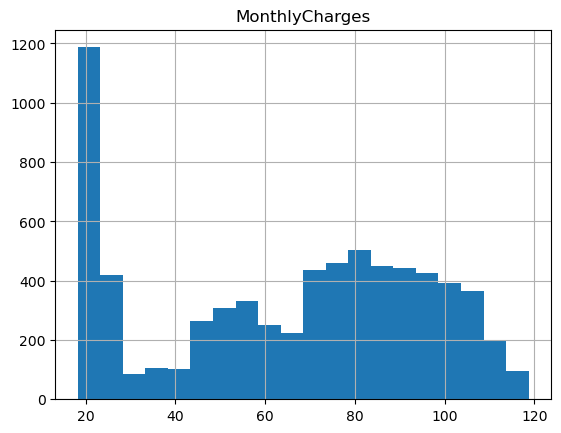

In [79]:
contract.hist(bins=20)

<Axes: >

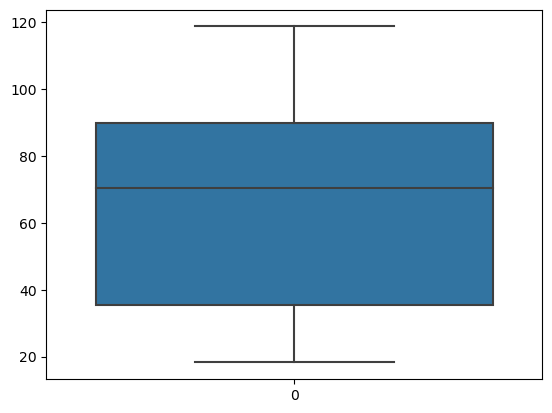

In [80]:
sns.boxplot(contract['MonthlyCharges'])

### personal

In [81]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [82]:
personal.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents
4352,0595-ITUDF,Male,0,Yes,Yes


In [83]:
personal.duplicated().sum()

0

In [84]:
personal['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [85]:
senior_citizen_freq=personal.groupby('SeniorCitizen')['customerID'].count()
senior_citizen_freq

SeniorCitizen
0    5901
1    1142
Name: customerID, dtype: int64

<Axes: xlabel='SeniorCitizen'>

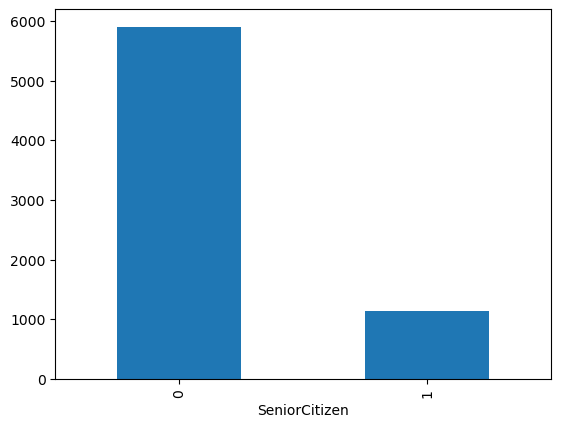

In [86]:
senior_citizen_freq.plot(kind='bar')

### internet

In [87]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [88]:
internet.sample()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5216,4940-KHCWD,DSL,Yes,Yes,No,Yes,No,No


In [89]:
internet.duplicated().sum()

0

### phone

In [90]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [91]:
phone.sample()

,customerID,MultipleLines
1155,8780-IHCRN,Yes


In [92]:
phone.duplicated().sum()

0

### Conclusion
Hasta ahora no hay datos ausentes, la mayoria de los clientes paga menos de 30 o 70 al mes y no son adultos mayores.

## Nombres de columnas

In [93]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [94]:
contract=contract.rename(columns={'customerID':'customer_id','BeginDate':'begin_date','EndDate':'end_date','Type':'type',
                                  'PaperlessBilling':'paperless_billing','PaymentMethod':'payment_method',
                                  'MonthlyCharges':'monthly_charges','TotalCharges':'total_charges'})
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [95]:
personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [96]:
personal=personal.rename(columns={'customerID':'customer_id','SeniorCitizen':'senior_citizen','Partner':'partner','Dependents':'dependents'})
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [97]:
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [98]:
internet=internet.rename(columns={'customerID':'customer_id','InternetService':'internet_service','OnlineSecurity':'online_security',
                                  'OnlineBackup':'online_backup','DeviceProtection':'device_protection','TechSupport':'teach_support',
                                  'StreamingTV':'streaming_tv','StreamingMovies':'streaming_movies'})
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [99]:
phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [100]:
phone=phone.rename(columns={'customerID':'customer_id','MultipleLines':'multiple_lines'})
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

## Datos ausentes
Es muy probable que algunos clientes no tienen alguno de los dos servicios: internet o teléfono. Necesito saber si alguno no tiene ninguno de estos dos servicios.

In [101]:
p_id=personal.customer_id
c_id=contract.customer_id
i_id=internet.customer_id
ph_id=phone.customer_id

In [102]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'contract'?
all([True if item in contract.customer_id.values else False for item in p_id.values])

True

In [103]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'internet'?
all([True if item in internet.customer_id.values else False for item in p_id.values])

False

In [104]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'phone'?
all([True if item in phone.customer_id.values else False for item in p_id.values])

False

In [105]:
# ¿cuantos clientes tienen ambos servicios, internet y teléfono?
internet_and_phone=personal[(personal.customer_id.isin(i_id))&(personal.customer_id.isin(ph_id))]['customer_id']
len(internet_and_phone)

4835

In [106]:
# ¿quienes son los clientes que no tienen internet?
not_internet=personal[~personal.customer_id.isin(i_id)]['customer_id']

len(not_internet)

1526

In [107]:
# ¿quienes son los clientes que no tienen teléfono?
not_phone=personal[~personal.customer_id.isin(ph_id)]['customer_id']
len(not_phone)

682

In [108]:
# ¿los clientes sin internet tampoco tienen teléfono?
any([True if item in not_internet.values else False for item in not_phone.values])

False

In [109]:
# ¿los clientes sin teléfono tampoco tienen internet?
any([True if item in not_phone.values else False for item in not_internet.values])

False

In [110]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [111]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

### Conclusion
- Los clientes son los mismos en la tabla ´personal' y 'çontract'. Esto significa que todos los clientes tienen registrado un contrato. Y tambien todos tienen alguno de los dos servicios: teléfono o internet.
- 4835 clientes tienen ambos servivios: internet y teléfono
- 1526 clientes no tienen internet
- 682 clientes no tienen teléfono.

Usaré esta información para combinar las cuatro tablas de datos.

# Preprocesamiento

A continuación, haré algunos cambios en los datos. Para no perder información, haré una copia de los datos originales.

In [112]:
# Antes de comenzar, haré una copia de las tablas originales
contract_original=contract.copy()
personal_original=personal.copy()
internet_original=internet.copy()
phone_original=phone.copy()

In [113]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [114]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [115]:
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [116]:
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [117]:
# Combino las tablas 'contract', 'personal', 'internet' y 'phone'
interconnect_data=contract.merge(personal, on='customer_id',how='outer')
interconnect_data=interconnect_data.merge(internet, on='customer_id',how='outer')
interconnect_data=interconnect_data.merge(phone, on='customer_id',how='outer')
interconnect_data.shape

(7043, 20)

In [118]:
interconnect_data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection',
       'teach_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Para revisar que las tablas estan combinadas correctamente, repito la conclusión de la seccion anterior:

- Los clientes son los mismos en la tabla ´personal' y 'çontract'. Esto significa que todos los clientes tienen registrado un contrato. Y tambien todos tienen alguno de los dos servicios: teléfono o internet.
- 4835 clientes tienen ambos servivios: internet y teléfono
- 1526 clientes no tienen internet
- 682 clientes no tienen teléfono.

In [119]:
len(interconnect_data)

7043

In [120]:
# la cantidad de datos no ausentes:
# ¿es la misma para los clientes de las columnas de la tabla 'contract' que las de la tabla 'personal'
# si es así, significa que todos los clientes tienen registrado un contrato
interconnect_data['begin_date'].notna().count()==interconnect_data['gender'].notna().count()

True

In [121]:
both_services=interconnect_data[interconnect_data['internet_service'].notna()&
                                interconnect_data['multiple_lines'].notna()]
len(both_services)

4835

In [122]:
not_internet=interconnect_data[interconnect_data['internet_service'].isna()]
len(not_internet)

1526

In [123]:
not_phone=interconnect_data[interconnect_data['multiple_lines'].isna()]
len(not_phone)

682

## Conclusion
La tabla se combinó correctamente. Aun falta procesar los datos de cada columna. Ultimos hallazgos:
- Todos los datos ausentes corresponden a clientes que no han contratado alguno de los servicios. 
- Son 7043 clientes en total, de ellos:
- 4835 clientes han contratado ambos servicios: internet y teléfono.
- 1526 no tienen internet.
- 682 no tienen teléfono.

## Tipos de datos

In [124]:
interconnect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  teach_support      5517 

In [125]:
interconnect_data.sample()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines
6264,2578-JQPHZ,2016-06-01,No,Two year,No,Bank transfer (automatic),100.1,4378.35,Male,0,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,No


In [126]:
# haré una copia de esta tabla, pues le haré muchos cambios
interconnect_original=interconnect_data.copy()

## Fechas

### begin_date

Es difícil adivinar el formato de las fechas de salida de los clientes, pues podría ser:
- año, mes, día
o bien:
- año, dia, mes
Sin embargo, seria muy extraño que los clientes solo se inscriban durante el mes de Enero de cada año. Es mas probable que inicien su contrato el primer día de cada mes. Entonces, voy a suponer que el formato de fecha es el primero: año, mes, día. Así, las fechas 1 de Enero del 2020, 1 de Abril del 2017, y 1 de Octubre del 2019, parecen mas normales.

- 'begin_date' contiene muchos datos diferentes tipo cadena. Es mas conveniente que el formato sea de fecha para poder ordenarlos, y mas adelante codificarlos como variables ordinales. **Los convertiré a fechas, revisaré la fecha mas antigua y la mas nueva, y ordenaré las fechas por días**. Hago esto para ayudar a los modelos a predecir correctamente usando estas fechas.

Por lo pronto en esta seccion procesaré la columna con fechas 'begin_date'

In [127]:
interconnect_data['begin_date'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [128]:
# cambio a formato fecha y me aseguro que los datos de las celdas tienen el formato correcto
interconnect_data['begin_date']=pd.to_datetime(interconnect_data['begin_date'], format='%Y-%m-%d')
type(interconnect_data['begin_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### codificación ordinal

In [129]:
# necesito saber la última fecha
max(interconnect_data['begin_date'])

Timestamp('2020-02-01 00:00:00')

In [130]:
# necesito saber la primera fecha
min(interconnect_data['begin_date'])

Timestamp('2013-10-01 00:00:00')

Bien, la última fecha es el 1 de Febrero del 2020, y la mas antigua es el 1 de Octubre del 2013.

Agregaré una columna con la fecha mas antigua para poder codificar las fechas de manera ordinal, hago esto para entrenar los modelos.

In [131]:
# crearé una columna con la fecha mas antiguas
interconnect_data['old_date_']=pd.to_datetime('2013-10-01', format='%Y-%m-%d')

In [132]:
# voy a codificar estas fechas como variables ordinales
interconnect_data['begin_date_']=(interconnect_data['begin_date']-interconnect_data['old_date_']).dt.days
interconnect_data['begin_date_']

0       2283
1       1278
2       2191
3        943
4       2161
        ... 
7038    1584
7039     123
7040    1977
7041    2099
7042     304
Name: begin_date_, Length: 7043, dtype: int64

In [133]:
# ¿quienes fueron los primeros 5 clientes en contratar el servicio?
interconnect_data.sort_values('begin_date_').head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
4513,8580-QVLOC,2013-10-01,2019-10-01 00:00:00,Two year,No,Credit card (automatic),92.45,6440.25,Female,1,...,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,0
4610,2889-FPWRM,2013-10-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),117.80,8684.8,Male,0,...,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,0
3439,0917-EZOLA,2013-10-01,2019-10-01 00:00:00,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Male,1,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2013-10-01,0
975,2834-JRTUA,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Electronic check,108.05,7532.15,Male,0,...,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,2013-10-01,31
3040,7317-GGVPB,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Credit card (automatic),108.60,7690.9,Male,0,...,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,31


In [134]:
# Elimino la columna 'old_date_', pues ya no la necesito
interconnect_data.drop('old_date_', axis=1, inplace=True)


#### Conclusion
Bien, la columna 'begin_date_' contiene las fechas de inscripción codificadas en número de días, listas para los modelos. Tomando en cuenta la fecha de captura de estos datos, Contiene los días transcurridos desde el primer cliente inscrito hasta el cliente inscrito en cada fila.

La última fecha es el 1 de Febrero del 2020, y la mas antigua es el 1 de Octubre del 2013.

### end_date

In [135]:
interconnect_data['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [136]:
interconnect_data.groupby('end_date')['customer_id'].count()

end_date
2019-10-01 00:00:00     458
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
No                     5174
Name: customer_id, dtype: int64

### Conclusion
Es difícil adivinar el formato de las fechas de salida de los clientes, pues podría ser:
- año, mes, día
o bien:
- año, dia, mes
Sin embargo, seria muy extraño que tantos clientes se hayan ido durante tres días seguidos: 10, 11 y 12 de Enero del 2019. Entonces, voy a suponer que el formato de fecha es el primero: año, mes, día. Así, las fechas 1 de Octubre, 1 de Noviembre, 1 de Diciembre y 1 de Enero parecen mas normales.
- otro dato: en esta columna 'end_date' la última fecha es el 1 de Enero del 2020. Mientras que en la columna 'begin_date' **la última fecha es el 1 de Febrero del 2020. Tomaré esta última como la última fecha estimada de captura todos estos datos.**

De cualquier manera, tendré que hacer algunos cambios de formato:
- 'end_date' es la columna objetivo, solo importa saber si el cliente se ha ido o no. No hay datos ausentes, si hubiera podría pensar que los datos ausentes son de clientes que siguen en la empresa o que no se han ido. Conclusión: **convertiré esta columna a datos booleanos. Si el dato es la cadena es 'No', el dato será negativo (0), si es cualquier otro valor, el dato será positivo (1).**

## Cadenas

In [137]:
interconnect_data['type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [138]:
interconnect_data['type'].replace('Month-to-month','Month to month',inplace=True)

In [139]:
interconnect_data['type'].unique()

array(['Month to month', 'One year', 'Two year'], dtype=object)

In [140]:
interconnect_data['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [141]:
interconnect_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [142]:
interconnect_data['internet_service'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [143]:
interconnect_data[interconnect_data['internet_service']=='nan']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,begin_date_


In [144]:
len(interconnect_data[interconnect_data['internet_service'].isna()])

1526

Contando datos ausentes, el resultado es de 1526 clientes con datos ausentes en la columna 'internet_service', es decir, que no tienen onternet. Esto coincide con el dato de secciones anteriores:
- 1526 clientes no tienen internet
- 682 clientes no tienen teléfono.

### Conclusion
Estas son las columnas que deben contener cadenas de texto. Todas contienen pocos datos completamente diferentes unos de otros, ninguno se parece por variaciones en la ortografía. Y aunque hay datos ausentes en la columna 'internet_service', la razón es que se trata de los clientes que no tienen internet.

No habrá ningun problema para codificar los datos de texto. 

Probablemente mas adelante, antes de entrenar modelos, ordenaré numéricamente los datos d ela columna 'type' ('Month to month', 'One year', 'Two year'). Esto para una mejor calidad de las predicciones de los modelos.

## Booleanos
columna objetivo, senior citizn y otros binarios

In [145]:
# Recordaré las columnas para saber cuales son los datos booleanos que falta procesar
interconnect_data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection',
       'teach_support', 'streaming_tv', 'streaming_movies', 'multiple_lines',
       'begin_date_'],
      dtype='object')

### 'end_date' y 'senior_citizen'
En realidad, estas dos columnas contienen datos booleanos: 'end_date' contiene cadenas y 'senior_citizen' números enteros. Ambos significan verdadero o falso.

Hasta ahora no me interesa conocer la fecha de cancelación de los clientes, solo necesito distinguir los clientes que se fugan de los que se quedan. Por otro lado, los números enteros en 'senior_citizen' tambien significan verdadero o falso, con el mismo significado.

Procesaré estas dos columnas por separado, pues todas las demas columnas con datos booleanos contienen únicamente las cadenas 'Yes' y 'No'. Estas últimas las abordaré en la siguiente seccion.

In [146]:
interconnect_data['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [147]:
def Not(data):
    if data=='No':
        bool=False
    else:
        bool=True
    return bool

In [148]:
interconnect_data['end_date_']=interconnect_data['end_date'].apply(Not)
interconnect_data['end_date_'].unique()

array([False,  True])

In [149]:
interconnect_data['senior_citizen'].unique()

array([0, 1], dtype=int64)

In [150]:
interconnect_data['senior_citizen'].replace({0:False,1:True},inplace=True)
interconnect_data['senior_citizen'].unique()

array([False,  True])

In [151]:
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

### 'Yes', 'No'
Debido a que son muchas las celdas que contienen como únicos datos las cadenas 'Yes' y 'No', usaré una función para convertir estos datos en True y False.
Hago aqui unas pqueñas, pero importantes, aclaraciones:

- Los datos ausentes 'Nan' son de personas que no tienen alguno d elos servicios: internet o teléfono. Permanecerá como está: dato 'Nan'.

- 'Yes' y 'No', por el contrario, son datos de personas que tienen o no alguna variación del internet ('online_security', 'online_backup','device_protection', 'teach_support', 'streaming_tv','streaming_movies'). Tambien significa que el cliente tiene teléfono pero no tiene o no el servicio 'multiple_lines'. Seran convertidos en datos booleanos 'True' 'False'.

- En pocas palabras: los datos 'Yes', 'No' y 'Nan' son completamente diferentes. Por lo tanto, 'Yes' será convertido en 'True', 'No" será 'False' y 'Nan' no será modificado.

In [152]:
# Dado que hay muchas columnas con los mismos datos 'Yes' y 'No, usaré una funcion:
def Yes_No (data):
    if data=='Yes':
        return True
    elif data=='No':
        return False

In [153]:
interconnect_data['paperless_billing'].unique()

array(['Yes', 'No'], dtype=object)

In [154]:
interconnect_data['paperless_billing']=interconnect_data['paperless_billing'].apply(Yes_No)
interconnect_data['paperless_billing'].unique()

array([ True, False])

In [155]:
interconnect_data['partner'].unique()

array(['Yes', 'No'], dtype=object)

In [156]:
interconnect_data['partner']=interconnect_data['partner'].apply(Yes_No)
interconnect_data['partner'].unique()

array([ True, False])

In [157]:
interconnect_data['dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [158]:
interconnect_data['dependents']=interconnect_data['dependents'].apply(Yes_No)
interconnect_data['dependents'].unique()

array([False,  True])

In [159]:
interconnect_data['online_security'].unique()

array(['No', 'Yes', nan], dtype=object)

In [160]:
interconnect_data['online_security']=interconnect_data['online_security'].apply(Yes_No)
interconnect_data['online_security'].unique()

array([False, True, None], dtype=object)

In [161]:
interconnect_data['online_backup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [162]:
interconnect_data['online_backup']=interconnect_data['online_backup'].apply(Yes_No)
interconnect_data['online_backup'].unique()

array([True, False, None], dtype=object)

In [163]:
interconnect_data['device_protection'].unique()

array(['No', 'Yes', nan], dtype=object)

In [164]:
interconnect_data['device_protection']=interconnect_data['device_protection'].apply(Yes_No)
interconnect_data['device_protection'].unique()

array([False, True, None], dtype=object)

In [165]:
interconnect_data['teach_support'].unique()

array(['No', 'Yes', nan], dtype=object)

In [166]:
interconnect_data['teach_support']=interconnect_data['teach_support'].apply(Yes_No)
interconnect_data['teach_support'].unique()

array([False, True, None], dtype=object)

In [167]:
interconnect_data['streaming_tv'].unique()

array(['No', 'Yes', nan], dtype=object)

In [168]:
interconnect_data['streaming_tv']=interconnect_data['streaming_tv'].apply(Yes_No)
interconnect_data['streaming_tv'].unique()

array([False, True, None], dtype=object)

In [169]:
interconnect_data['streaming_movies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [170]:
interconnect_data['streaming_movies']=interconnect_data['streaming_movies'].apply(Yes_No)
interconnect_data['streaming_movies'].unique()

array([False, True, None], dtype=object)

In [171]:
interconnect_data['multiple_lines'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [172]:
interconnect_data['multiple_lines']=interconnect_data['multiple_lines'].apply(Yes_No)
interconnect_data['multiple_lines'].unique()

array([None, False, True], dtype=object)

## Flotantes
El tipo esperado de datos en la columna 'total_charges' es flotante, sin embargo son cadenas de texto.

In [173]:
len(interconnect_data.total_charges.unique())

6531

Son demasiados datos diferentes para manejarlos a mano. Necesitaré un cambio de formato automático.

In [174]:
interconnect_data['total_charges']=interconnect_data['total_charges'].str.strip()

#interconnect_data['total_charges']=interconnect_data['total_charges'].str.isdigit()

#interconnect_data['total_charges']=interconnect_data['total_charges'].astype(float)

In [175]:
len(interconnect_data[interconnect_data['total_charges']==''])

11

11 de loc clientes tienen una cadena vacía en su pago acumulado. Veamos porqué, examinaré los datos.

In [176]:
table1=interconnect_data[interconnect_data['total_charges']=='']
table1

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,begin_date_,end_date_
488,4472-LVYGI,2020-02-01,No,Two year,True,Bank transfer (automatic),52.55,,Female,False,...,DSL,True,False,True,True,True,False,None,2314,False
753,3115-CZMZD,2020-02-01,No,Two year,False,Mailed check,20.25,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
936,5709-LVOEQ,2020-02-01,No,Two year,False,Mailed check,80.85,,Female,False,...,DSL,True,True,True,False,True,True,False,2314,False
1082,4367-NUYAO,2020-02-01,No,Two year,False,Mailed check,25.75,,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
1340,1371-DWPAZ,2020-02-01,No,Two year,False,Credit card (automatic),56.05,,Female,False,...,DSL,True,True,True,True,True,False,None,2314,False
3331,7644-OMVMY,2020-02-01,No,Two year,False,Mailed check,19.85,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
3826,3213-VVOLG,2020-02-01,No,Two year,False,Mailed check,25.35,,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
4380,2520-SGTTA,2020-02-01,No,Two year,False,Mailed check,20.00,,Female,False,...,NaN,None,None,None,None,None,None,False,2314,False
5218,2923-ARZLG,2020-02-01,No,One year,True,Mailed check,19.70,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
6670,4075-WKNIU,2020-02-01,No,Two year,False,Mailed check,73.35,,Female,False,...,DSL,False,True,True,True,True,False,True,2314,False


In [177]:
date=pd.to_datetime('2020-02-01', format='%Y-%m-%d')
table2=interconnect_data[interconnect_data['begin_date']==date]
table2

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,begin_date_,end_date_
488,4472-LVYGI,2020-02-01,No,Two year,True,Bank transfer (automatic),52.55,,Female,False,...,DSL,True,False,True,True,True,False,None,2314,False
753,3115-CZMZD,2020-02-01,No,Two year,False,Mailed check,20.25,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
936,5709-LVOEQ,2020-02-01,No,Two year,False,Mailed check,80.85,,Female,False,...,DSL,True,True,True,False,True,True,False,2314,False
1082,4367-NUYAO,2020-02-01,No,Two year,False,Mailed check,25.75,,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
1340,1371-DWPAZ,2020-02-01,No,Two year,False,Credit card (automatic),56.05,,Female,False,...,DSL,True,True,True,True,True,False,None,2314,False
3331,7644-OMVMY,2020-02-01,No,Two year,False,Mailed check,19.85,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
3826,3213-VVOLG,2020-02-01,No,Two year,False,Mailed check,25.35,,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
4380,2520-SGTTA,2020-02-01,No,Two year,False,Mailed check,20.00,,Female,False,...,NaN,None,None,None,None,None,None,False,2314,False
5218,2923-ARZLG,2020-02-01,No,One year,True,Mailed check,19.70,,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
6670,4075-WKNIU,2020-02-01,No,Two year,False,Mailed check,73.35,,Female,False,...,DSL,False,True,True,True,True,False,True,2314,False


In [178]:
table1==table2

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,begin_date_,end_date_
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
753,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Los clientes que tienen una cadena vacía en la columna 'total_charges' es porque aun no realizan su pago porque son clientes nuevos. Entonces, su pago acumulado debería ser igual a 0. Reemplazaré las cadenas vacías por un 0.

In [179]:
table1=interconnect_data[interconnect_data['total_charges']=='']
table1

interconnect_data['total_charges']=interconnect_data['total_charges'].replace('',0)
interconnect_data[interconnect_data['total_charges']==0]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,begin_date_,end_date_
488,4472-LVYGI,2020-02-01,No,Two year,True,Bank transfer (automatic),52.55,0,Female,False,...,DSL,True,False,True,True,True,False,None,2314,False
753,3115-CZMZD,2020-02-01,No,Two year,False,Mailed check,20.25,0,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
936,5709-LVOEQ,2020-02-01,No,Two year,False,Mailed check,80.85,0,Female,False,...,DSL,True,True,True,False,True,True,False,2314,False
1082,4367-NUYAO,2020-02-01,No,Two year,False,Mailed check,25.75,0,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
1340,1371-DWPAZ,2020-02-01,No,Two year,False,Credit card (automatic),56.05,0,Female,False,...,DSL,True,True,True,True,True,False,None,2314,False
3331,7644-OMVMY,2020-02-01,No,Two year,False,Mailed check,19.85,0,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
3826,3213-VVOLG,2020-02-01,No,Two year,False,Mailed check,25.35,0,Male,False,...,NaN,None,None,None,None,None,None,True,2314,False
4380,2520-SGTTA,2020-02-01,No,Two year,False,Mailed check,20.00,0,Female,False,...,NaN,None,None,None,None,None,None,False,2314,False
5218,2923-ARZLG,2020-02-01,No,One year,True,Mailed check,19.70,0,Male,False,...,NaN,None,None,None,None,None,None,False,2314,False
6670,4075-WKNIU,2020-02-01,No,Two year,False,Mailed check,73.35,0,Female,False,...,DSL,False,True,True,True,True,False,True,2314,False


In [180]:
# ya puedo convertir los datos a tipo float
interconnect_data['total_charges']=interconnect_data['total_charges'].astype(float)

In [181]:
interconnect_data.info() # me aseguro que los datos han sido cambiados de formato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   bool          
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   bool          
 10  partner            7043 non-null   bool          
 11  dependents         7043 non-null   bool          
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

## Columnas no necesarias
La columna 'customer_id' no es importante para las predicciones. 'begin_date' y 'end_date' las he modificado en columnas aparte buscando mejores predicciones.

Por lo tanto elimino estas columnas pro ahora. Si las necesito mas adelante, estan guardadas en la tabla original 'interconnect_original'.

In [182]:
interconnect_data.drop(['customer_id','begin_date','end_date'],axis=1,inplace=True)
interconnect_data.columns


Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies', 'multiple_lines', 'begin_date_', 'end_date_'],
      dtype='object')

## Relaciones

### Cadenas

#### type

end_date_       False  True 
type                        
Month to month   2220   1655
One year         1307    166
Two year         1647     48


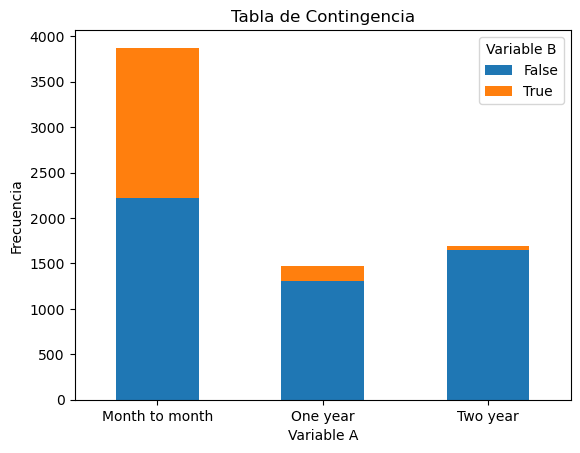

In [108]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['type'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### payment_method

end_date_                  False  True 
payment_method                         
Bank transfer (automatic)   1286    258
Credit card (automatic)     1290    232
Electronic check            1294   1071
Mailed check                1304    308


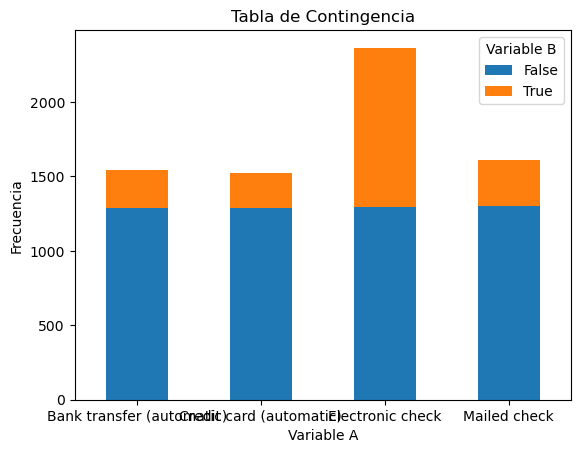

In [109]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['payment_method'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### gender

end_date_  False  True 
gender                 
Female      2549    939
Male        2625    930


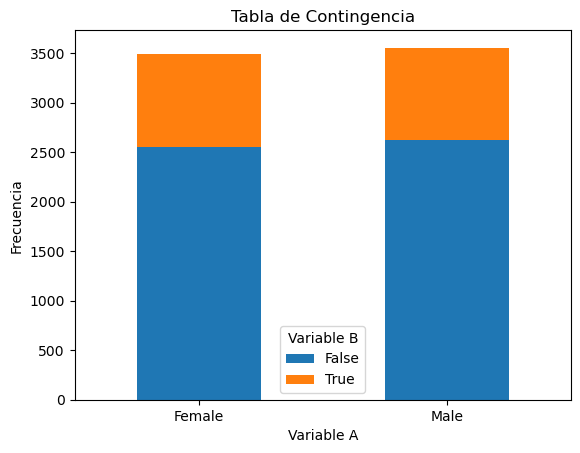

In [110]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['gender'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### internet_service

end_date_         False  True 
internet_service              
DSL                1962    459
Fiber optic        1799   1297


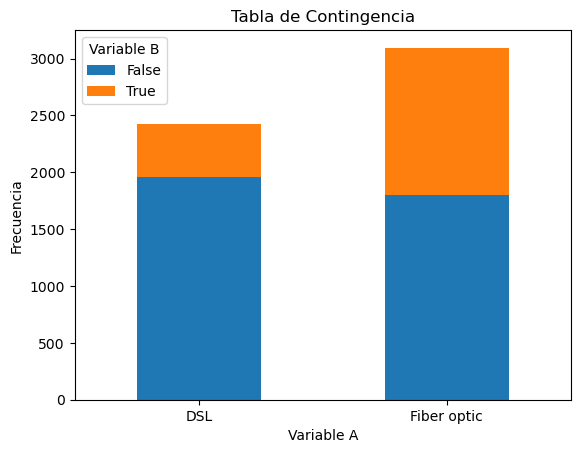

In [111]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['internet_service'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### online_security

end_date_        False  True 
online_security              
False             2037   1461
True              1724    295


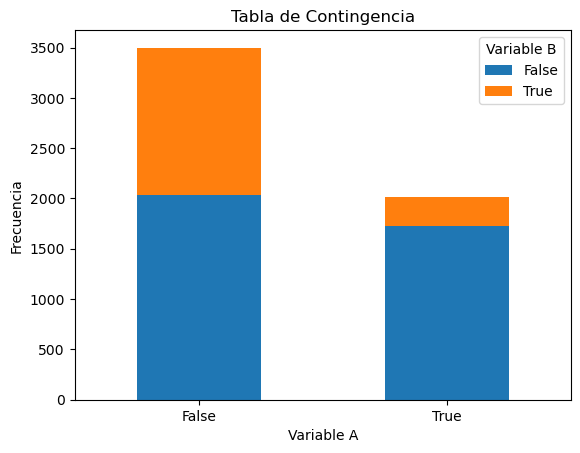

In [112]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['online_security'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### online_backup

end_date_      False  True 
online_backup              
False           1855   1233
True            1906    523


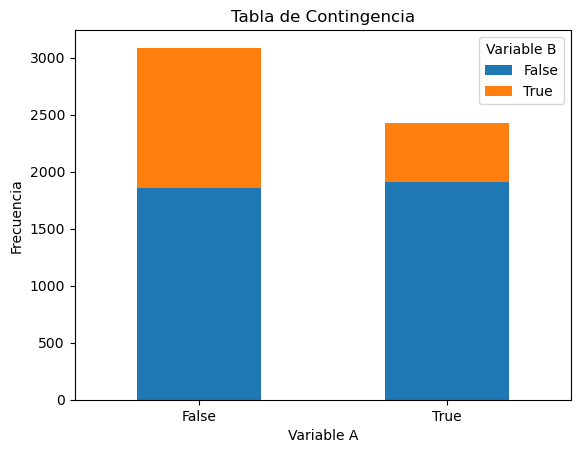

In [113]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['online_backup'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### device_protection

end_date_          False  True 
device_protection              
False               1884   1211
True                1877    545


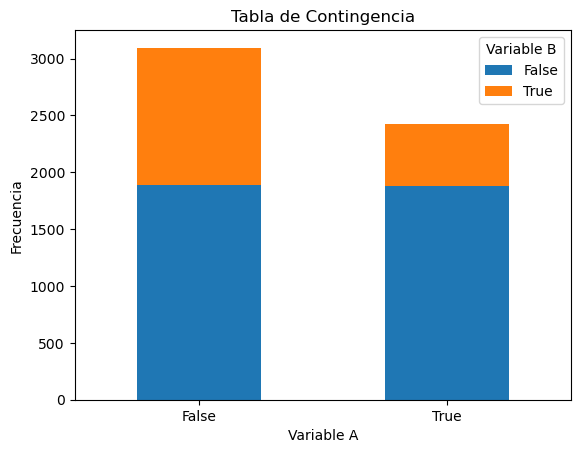

In [114]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['device_protection'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### teach_support

end_date_      False  True 
teach_support              
False           2027   1446
True            1734    310


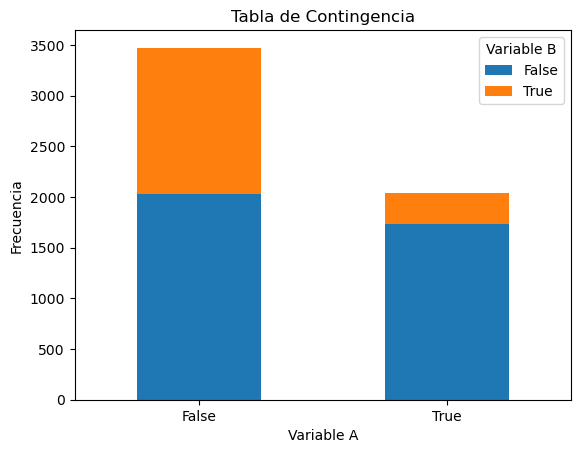

In [115]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['teach_support'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### streaming_tv

end_date_     False  True 
streaming_tv              
False          1868    942
True           1893    814


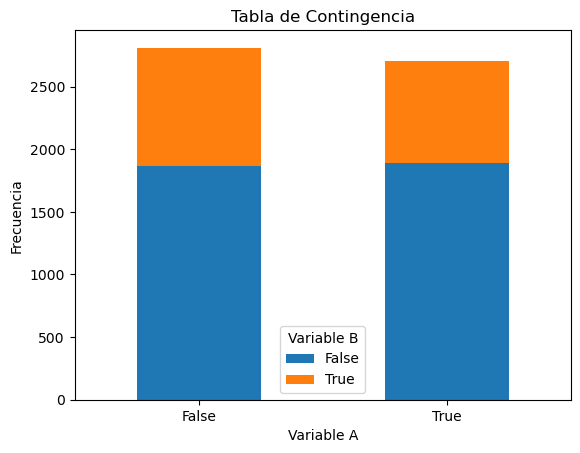

In [116]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['streaming_tv'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### streaming_movies

end_date_         False  True 
streaming_movies              
False              1847    938
True               1914    818


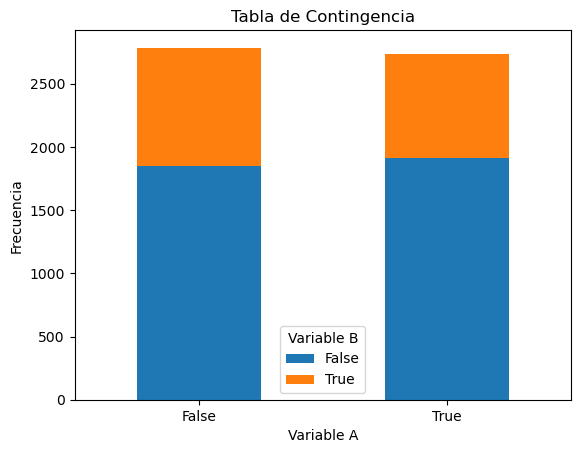

In [117]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['streaming_movies'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

#### multiple_lines

end_date_       False  True 
multiple_lines              
False            2541    849
True             2121    850


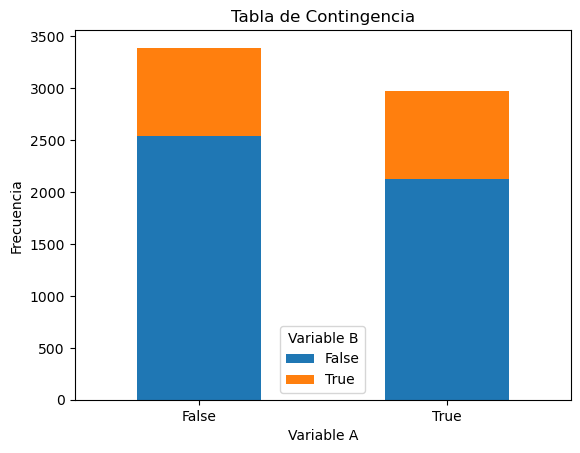

In [118]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['multiple_lines'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Tabla de Contingencia')
plt.xlabel('Variable A')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Variable B')
plt.show()

### Booleanos
Algunas de las variables anteriores, aunque son cadenas, parecen tener muy poca influencia en el resultado True o False de 'end_date'. Mejor los graficaré en un doagrama pastel como variables booleanas: 'gender', 'streaming_movies', 'streaming_tv' y 'multiple_lines'.

#### paperless_billing

end_date_          False  True 
paperless_billing              
False               2403    469
True                2771   1400


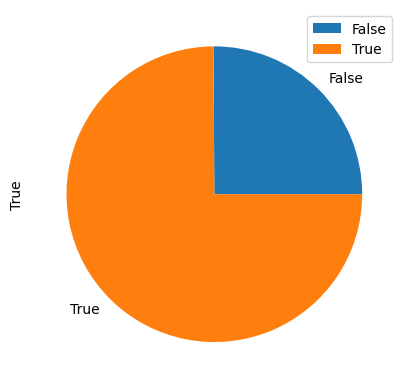

In [119]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['paperless_billing'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

#### senior_citizen

end_date_       False  True 
senior_citizen              
False            4508   1393
True              666    476


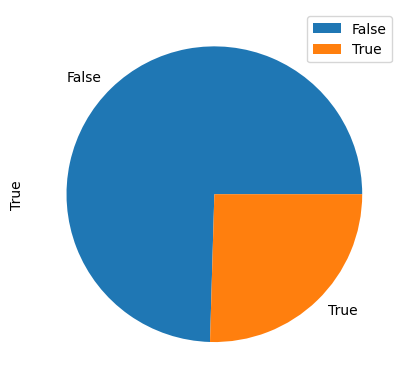

In [120]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['senior_citizen'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

#### partner

end_date_  False  True 
partner                
False       2441   1200
True        2733    669


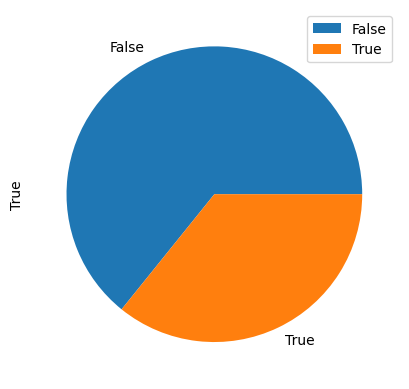

In [121]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['partner'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

#### dependents

end_date_   False  True 
dependents              
False        3390   1543
True         1784    326


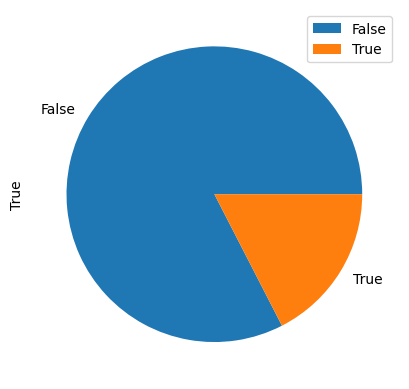

In [122]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['dependents'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

#### gender

end_date_  False  True 
gender                 
Female      2549    939
Male        2625    930


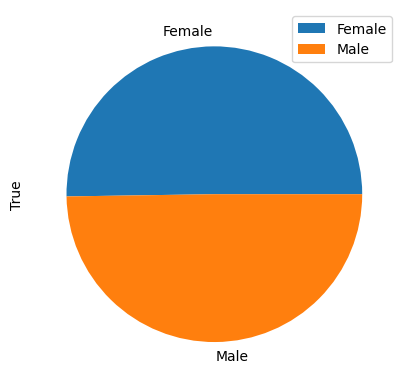

In [123]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['gender'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

In [124]:
contingency_table.describe()

end_date_,False,True
count,2.000000,2.000000
mean,2587.000000,934.500000
std,53.740115,6.363961
min,2549.000000,930.000000
25%,2568.000000,932.250000
50%,2587.000000,934.500000
75%,2606.000000,936.750000
max,2625.000000,939.000000


#### streaming movies

end_date_         False  True 
streaming_movies              
False              1847    938
True               1914    818


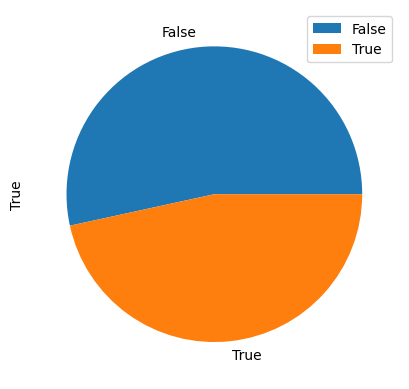

In [125]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['streaming_movies'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

In [126]:
contingency_table.describe()

end_date_,False,True
count,2.000000,2.000000
mean,1880.500000,878.000000
std,47.376154,84.852814
min,1847.000000,818.000000
25%,1863.750000,848.000000
50%,1880.500000,878.000000
75%,1897.250000,908.000000
max,1914.000000,938.000000


#### streming tv

end_date_     False  True 
streaming_tv              
False          1868    942
True           1893    814


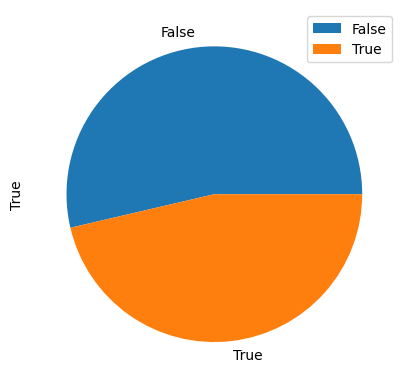

In [127]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['streaming_tv'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

In [128]:
contingency_table.describe()

end_date_,False,True
count,2.00000,2.000000
mean,1880.50000,878.000000
std,17.67767,90.509668
min,1868.00000,814.000000
25%,1874.25000,846.000000
50%,1880.50000,878.000000
75%,1886.75000,910.000000
max,1893.00000,942.000000


#### multiple lines

end_date_       False  True 
multiple_lines              
False            2541    849
True             2121    850


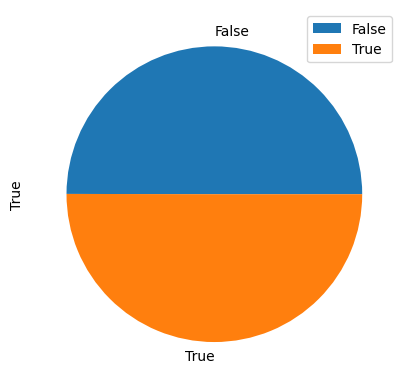

In [129]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['multiple_lines'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table.plot.pie(y=True)
plt.show()

In [130]:
contingency_table.describe()

end_date_,False,True
count,2.000000,2.000000
mean,2331.000000,849.500000
std,296.984848,0.707107
min,2121.000000,849.000000
25%,2226.000000,849.250000
50%,2331.000000,849.500000
75%,2436.000000,849.750000
max,2541.000000,850.000000


### Flotantes y Fechas

#### monthly charges

end_date_        False  True 
monthly_charges              
18.25                1      0
18.40                1      0
18.55                1      0
18.70                2      0
18.75                1      0
...                ...    ...
118.20               1      0
118.35               0      1
118.60               2      0
118.65               1      0
118.75               1      0

[1585 rows x 2 columns]


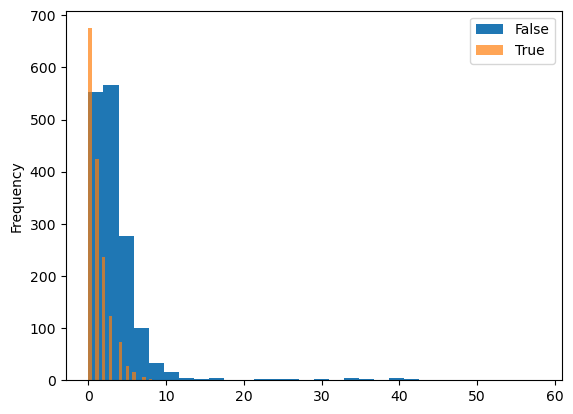

In [131]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['monthly_charges'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table[False].plot(kind='hist', bins=30)
contingency_table[True].plot(kind='hist', bins=30,alpha=0.7)
plt.legend(['False', 'True'])
plt.show()

In [132]:
contingency_table.describe()

end_date_,False,True
count,1585.000000,1585.000000
mean,3.264353,1.179180
std,4.643084,1.455379
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,4.000000,2.000000
max,58.000000,13.000000


#### total_charges

end_date_      False  True 
total_charges              
0.00              11      0
18.80              1      0
18.85              1      1
18.90              1      0
19.00              1      0
...              ...    ...
8564.75            1      0
8594.40            1      0
8670.10            1      0
8672.45            1      0
8684.80            0      1

[6531 rows x 2 columns]


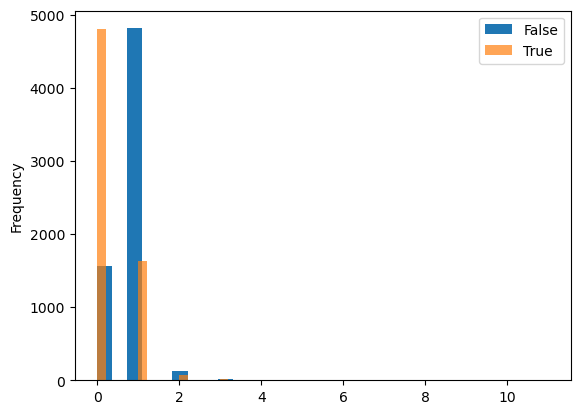

In [133]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['total_charges'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

contingency_table[False].plot(kind='hist', bins=30)
contingency_table[True].plot(kind='hist', bins=30,alpha=0.7)
plt.legend(['False', 'True'])
plt.show()

In [134]:
contingency_table.describe()

end_date_,False,True
count,6531.000000,6531.000000
mean,0.792222,0.286174
std,0.518427,0.510853
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,11.000000,6.000000


In [135]:
contingency_table.describe()

end_date_,False,True
count,6531.000000,6531.000000
mean,0.792222,0.286174
std,0.518427,0.510853
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,11.000000,6.000000


#### begin_date_

<Axes: ylabel='Frequency'>

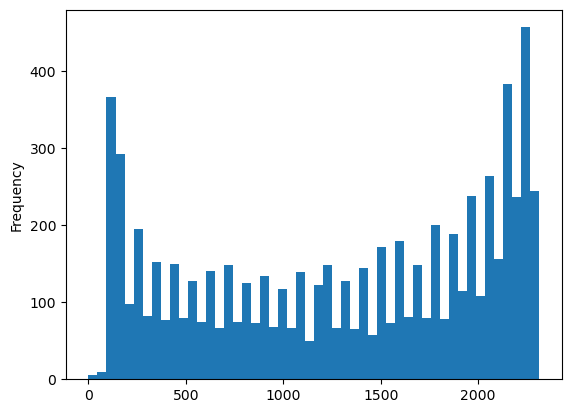

In [136]:
interconnect_data['begin_date_'].plot(kind='hist', bins=50)

Segun el gráfico, hay muchos clientes nuevos, pero son aun mas los clientes antiguos. Esto puede significar que la mayoria permanecen en la empresa. Pero esto no dice nada, necesito saber cuantos de ellos se han ido y cuantos se han quedado.

Haré otro gráfico.

In [137]:
# Crear la tabla de contingencia (tabla cruzada)
contingency_table = pd.crosstab(interconnect_data['begin_date_'], interconnect_data['end_date_'])

# Mostrar la tabla de contingencia
#print("Tabla de Contingencia:")
print(contingency_table)

end_date_    False  True 
begin_date_              
0                0      3
31               0      2
61               0      3
92               0      7
123            356     10
...            ...    ...
2191            93    144
2222           106    131
2252           115    105
2283           233      0
2314            11      0

[77 rows x 2 columns]


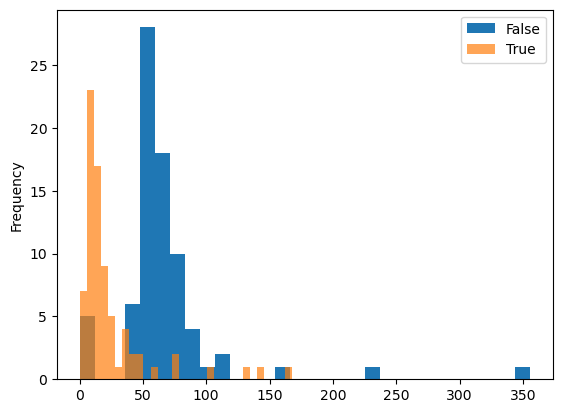

In [138]:
contingency_table[False].plot(kind='hist', bins=30)
contingency_table[True].plot(kind='hist', bins=30,alpha=0.7)
plt.legend(['False', 'True'])
plt.show()

In [139]:
contingency_table.describe()

end_date_,False,True
count,77.000000,77.000000
mean,67.194805,24.272727
std,45.686586,31.121847
min,0.000000,0.000000
25%,52.000000,9.000000
50%,59.000000,14.000000
75%,72.000000,26.000000
max,356.000000,168.000000


Bien, esto significa que la mayoria de los clientes que se han ido lo hacen a los 15 o 20 días de haber contratado el servicio. Y si no se retiran, la mayoría permanecen dos meses.
**Conclusion: hay una fueret influencia del tiempo en la empresa en la tasa de cancelacion**

#### Conclusion
Los valores en las columnas 'gender' y 'multiple_lines' parecen tener poca o ninguna influencia en los valores True o False en el target 'end_date'.
Los eliminaré de la tabla.

In [140]:
interconnect_data.drop(['gender','multiple_lines'],axis=1,inplace=True)
interconnect_data.columns

Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies', 'begin_date_', 'end_date_'],
      dtype='object')

# Modelado

## Equilibrio de clases: target
Antes de codificar los datos para que puedan ser procesados por los modelos, revisaré la distribución de las clases positiva y negativa de la característica target 'excited'. Hago esto para tener una idea de cómo entrenar los modelos y mejorarlos.

In [141]:
interconnect_data['end_date_'].value_counts()

end_date_
False    5174
True     1869
Name: count, dtype: int64

Existe un fuerte desequilibro de clases, es mas rara la clase True. los modelos entrenarán con una mayoría de clases negativas. Esto puede afectar las predicciones.

end_date_
False    0.73463
True     0.26537
Name: proportion, dtype: float64


<Axes: xlabel='end_date_'>

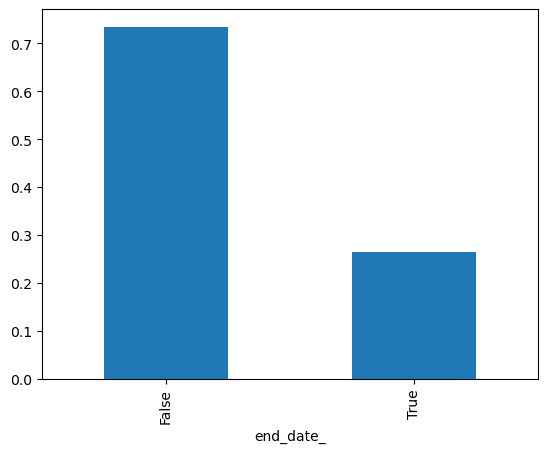

In [142]:
class_frequency = interconnect_data['end_date_'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

## Conjuntos de datos

### Sin codificación
En las siguientes secciones, la codificación por etiquetas generará algunos datos ausentes por error. Esto puede hacer que los modelos generen error.

Para poder imputar datos ausentes, haré la misma división de los datos originales sin codificar en: entrenamiento, validación y prueba.

Para asegurarme que los conjuntos de filas son los mismos en todas las divisiones con 'train_test_split()', usaré el mismo parámetro 'random_state'.

In [143]:
target = interconnect_data['end_date_']
features = interconnect_data.drop('end_date_', axis=1)

# Voy a separar en prueba y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Para la prueba final, voy a dividir en validacion y prueba
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

### Codificación Dummy

In [144]:
data_ohe = pd.get_dummies(interconnect_data)
target = data_ohe['end_date_']
features = data_ohe.drop('end_date_', axis=1)

#target=interconnect_data['end_date_']
#features = interconnect_data.drop('end_date_', axis=1)
#features=pd.get_dummies(features)

# Voy a separar en prueba y validación
features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_test_split(features, target, test_size=0.25, random_state=12345)

# Para la prueba final, voy a dividir en validacion y prueba
features_valid_ohe, features_test_ohe, target_valid_ohe, target_test_ohe = train_test_split(features_valid_ohe, target_valid_ohe, test_size=0.5, random_state=12345)

### Codificación por etiquetas

In [145]:
encoder = OrdinalEncoder()

data_ordinal = pd.DataFrame(encoder.fit_transform(interconnect_data), columns=interconnect_data.columns)
target = data_ordinal['end_date_']
features = data_ordinal.drop('end_date_', axis=1)

#encoder.fit(interconnect_data)
#target=interconnect_data['end_date_']
#features = interconnect_data.drop('end_date_', axis=1)
#features=pd.DataFrame(encoder.transform(interconnect_data), columns=interconnect_data.columns)


# Voy a separar en prueba y validación
features_train_ord, features_valid_ord, target_train_ord, target_valid_ord  =train_test_split(features, target, test_size=0.25, random_state=12345)

# Para la prueba final, voy a dividir en validacion y prueba
features_valid_ord, features_test_ord, target_valid_ord, target_test_ord  =train_test_split(features_valid_ord, target_valid_ord, test_size=0.5, random_state=12345)

### Escalado de datos numéricos

In [146]:
interconnect_data.describe()

,monthly_charges,total_charges,begin_date_
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,1307.542950
std,30.090047,2266.794470,736.596428
min,18.250000,0.000000,0.000000
25%,35.500000,398.550000,608.000000
50%,70.350000,1394.550000,1431.000000
75%,89.850000,3786.600000,2008.000000
max,118.750000,8684.800000,2314.000000


Los números máximos de las tres columnas son muy diferentes: 118, 8684 y 2314. Esto puede alterar los resultados, pues los modelos pueden asignar mas peso o importancia a 'total_charges', luego a 'begin_date_', y el menos importante sería 'monthly_charges'. Para evitarlo, escalaré estos datos numéricos.

In [147]:
# Haré una lista con las características numéricas
numeric=['monthly_charges','total_charges','begin_date_']

# Crearé una isntancia de la clase 'StandardScaler'
scaler = StandardScaler()

# Entreno la instancia con los conjuntos de datos de características, técnica 'OHE'
scaler.fit(features_train_ohe[numeric])
scaler.fit(features_valid_ohe[numeric])
scaler.fit(features_test_ohe[numeric])

# Entreno la instancia con los conjuntos de datos de características, técnica 'Codificación de etiquetas'
scaler.fit(features_train_ord[numeric])
scaler.fit(features_valid_ord[numeric])
scaler.fit(features_test_ord[numeric])

# Escalaré estas columnas de los conjuntos de datos de características, codificados con la técnica 'OHE'
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

# Y tambien las datos codificados con la técnica 'Codificación de Etiquetas'
features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler.transform(features_valid_ord[numeric])
features_test_ord[numeric] = scaler.transform(features_test_ord[numeric])

### EDA: Datos codificados
Revisaré rápidamente si hay datos ausentes en los nuevos conjuntos de datos codificados

In [161]:
features_train_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 845 to 4578
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               5282 non-null   float64
 1   paperless_billing  5282 non-null   float64
 2   payment_method     5282 non-null   float64
 3   monthly_charges    5282 non-null   float64
 4   total_charges      5282 non-null   float64
 5   senior_citizen     5282 non-null   float64
 6   partner            5282 non-null   float64
 7   dependents         5282 non-null   float64
 8   internet_service   4147 non-null   float64
 9   online_security    5282 non-null   float64
 10  online_backup      5282 non-null   float64
 11  device_protection  5282 non-null   float64
 12  teach_support      5282 non-null   float64
 13  streaming_tv       5282 non-null   float64
 14  streaming_movies   5282 non-null   float64
 15  begin_date_        5282 non-null   float64
dtypes: float64(16)
memory usage

In [162]:
features_valid_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 3616 to 1945
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               880 non-null    float64
 1   paperless_billing  880 non-null    float64
 2   payment_method     880 non-null    float64
 3   monthly_charges    880 non-null    float64
 4   total_charges      880 non-null    float64
 5   senior_citizen     880 non-null    float64
 6   partner            880 non-null    float64
 7   dependents         880 non-null    float64
 8   internet_service   679 non-null    float64
 9   online_security    880 non-null    float64
 10  online_backup      880 non-null    float64
 11  device_protection  880 non-null    float64
 12  teach_support      880 non-null    float64
 13  streaming_tv       880 non-null    float64
 14  streaming_movies   880 non-null    float64
 15  begin_date_        880 non-null    float64
dtypes: float64(16)
memory usage

In [163]:
features_test_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 6267 to 1650
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               881 non-null    float64
 1   paperless_billing  881 non-null    float64
 2   payment_method     881 non-null    float64
 3   monthly_charges    881 non-null    float64
 4   total_charges      881 non-null    float64
 5   senior_citizen     881 non-null    float64
 6   partner            881 non-null    float64
 7   dependents         881 non-null    float64
 8   internet_service   691 non-null    float64
 9   online_security    881 non-null    float64
 10  online_backup      881 non-null    float64
 11  device_protection  881 non-null    float64
 12  teach_support      881 non-null    float64
 13  streaming_tv       881 non-null    float64
 14  streaming_movies   881 non-null    float64
 15  begin_date_        881 non-null    float64
dtypes: float64(16)
memory usage

Efectivamente, hay algunos datos ausentes. Es extraño: solo es la columna 'internet_service', parece que son clientes que no tienen internet, y sin embargo tienen servicios como 'online_security' y 'streaming_tv'. Segun la tabla original 'internet', todos los clientes que tienen este servicio es porque tienen internet. Seguro se trata de un error en el calculo de la codificación de etiquetas.

Voy a consultar las tablas sin codificar: 'features_train', 'features_valid' y 'features_test'. Contiene la información que necesito para imputar estos datos ausentes.

In [166]:
features_internet=features_train['internet_service']
features_internet.name='internet_service_original'
features_concat=pd.concat([features_train_ord,features_internet],axis=1)
features_concat.columns

Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies', 'begin_date_', 'internet_service_original'],
      dtype='object')

In [170]:
features_concat.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,begin_date_,internet_service_original
845,1.0,0.0,3.0,-1.345028,-0.958274,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,0.692617,NaN
6386,2.0,1.0,1.0,0.617853,1.474827,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,-1.630617,DSL
1194,0.0,0.0,2.0,-0.613717,-0.469605,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.733375,DSL
5787,0.0,1.0,2.0,0.785313,0.718773,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.285587,Fiber optic
3585,1.0,0.0,3.0,0.893420,0.735677,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.081795,Fiber optic


In [175]:
features_concat[features_concat['internet_service'].isna()
                &features_concat['internet_service_original'].notna()]

,type,paperless_billing,payment_method,monthly_charges,total_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,begin_date_,internet_service_original


### Conclusión: nombres

**Colcusion: Estan listos los conjuntos de datos:*
**Para modelos Arbol y Bosque:**
- features_train_ord, target_train_ord. Conjuntos de entrenamiento. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.
- features_valid_ord, target_valid_ord. Conjuntos de validación. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.
- features_test_ord, target_test_ord. Conjuntos de prueba. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.

**Para el modelo Regresión Logística:**
- features_train_ohe, target_train_ohe. Conjuntos de entrenamiento. Datos numéricos escalados. Datos categóricos: codificación OHE (One-Hot Encoding).
- features_valid_ohe, target_valid_ohe. Conjuntos de validación. Datos numéricos escalados. Datos categóricos: codificación OHE.
- features_test_ohe, target_test_ohe. Conjuntos de prueba. Datos numéricos escalados. Datos categóricos: codificación OHE.

## Modelo constante

El siguiente es un modelo dummy quees, simplemente, un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de un cliente de darse de baja, 0.5, 1.
La probabilidad de un cliente de darse de baja puede definirse como
$$
P\{\text{baja de clientes}\}=\frac{\text{número de clientes que se van}}{\text{número total de clientes}}.
$$

In [152]:
def eval_predic_proba(target,predict,prob):
    accuracy=accuracy_score(target, predict)
    print(f'Exactitud: {accuracy:.2f}')

    auc_roc = roc_auc_score(target, prob)
    
    print("AUC_ROC: ", auc_roc)
    print()

    fpr, tpr, thresholds = roc_curve(target, prob)# < escribe el código aquí >

    plt.figure()

    # < traza la gráfica >
    plt.plot(fpr, tpr)
    # Curva ROC para modelo aleatorio (parece una línea recta)
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < utiliza las funciones plt.xlim() y plt.ylim() para
    #   establecer el límite para los ejes de 0 a 1 >
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # < utiliza las funciones plt.xlabel() y plt.ylabel() para
    #   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    # < agrega el encabezado "Curva ROC" con la función plt.title() >
    plt.title('Curva ROC')
    plt.show()
    

In [153]:
# generar la salida de un modelo aleatorio

def out_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Prediccion: 0.00
Exactitud: 0.73
AUC_ROC:  0.5



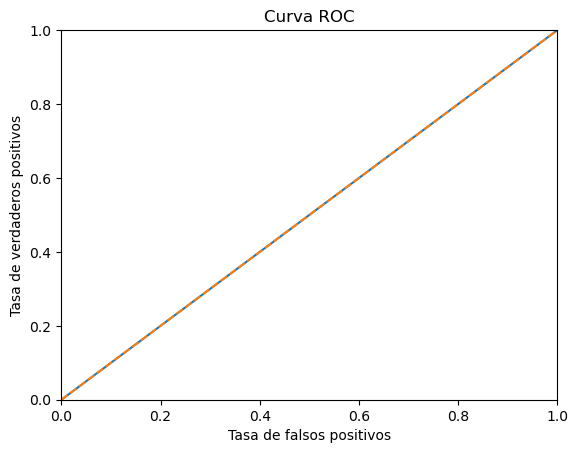

Prediccion: 0.27
Exactitud: 0.62
AUC_ROC:  0.5031457964804472



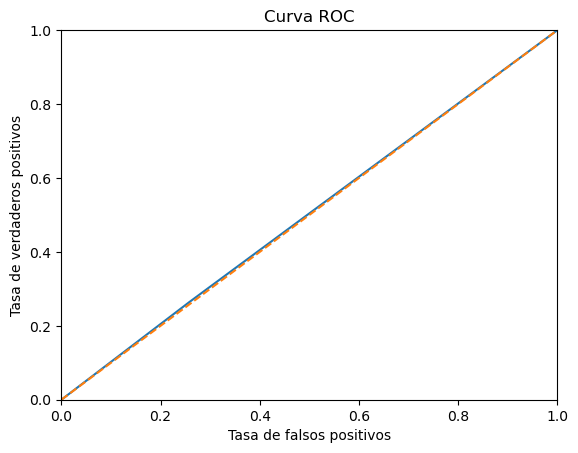

Prediccion: 0.50
Exactitud: 0.50
AUC_ROC:  0.4974148947809385



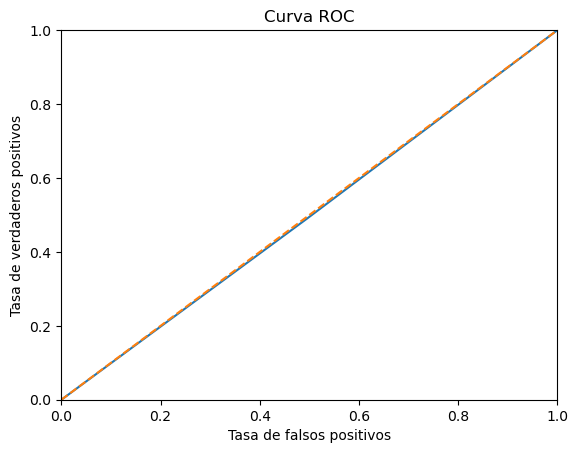

Prediccion: 1.00
Exactitud: 0.27
AUC_ROC:  0.5



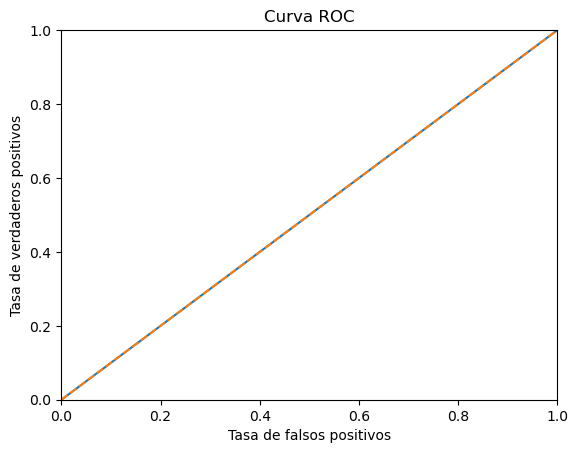

In [154]:
for P in [0, interconnect_data['end_date_'].sum() / len(interconnect_data), 0.5, 1]:

    print(f'Prediccion: {P:.2f}')
    predictions = out_predict(P,len(interconnect_data))
    # este es el modelo constante, aun no calculo probabilidades
    probabilities=predictions

    eval_predic_proba(target,predictions,probabilities)

## Modelo Arbol


**Colcusion: Estan listos los conjuntos de datos:*
**Para modelos Arbol y Bosque:**
- features_train_ord, target_train_ord. Conjuntos de entrenamiento. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.
- features_valid_ord, target_valid_ord. Conjuntos de validación. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.
- features_test_ord, target_test_ord. Conjuntos de prueba. Datos numéricos escalados. Datos categóricos: codificación de etiquetas.

In [155]:
features_train_ord.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 845 to 4578
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               5282 non-null   float64
 1   paperless_billing  5282 non-null   float64
 2   payment_method     5282 non-null   float64
 3   monthly_charges    5282 non-null   float64
 4   total_charges      5282 non-null   float64
 5   senior_citizen     5282 non-null   float64
 6   partner            5282 non-null   float64
 7   dependents         5282 non-null   float64
 8   internet_service   4147 non-null   float64
 9   online_security    5282 non-null   float64
 10  online_backup      5282 non-null   float64
 11  device_protection  5282 non-null   float64
 12  teach_support      5282 non-null   float64
 13  streaming_tv       5282 non-null   float64
 14  streaming_movies   5282 non-null   float64
 15  begin_date_        5282 non-null   float64
dtypes: float64(16)
memory usage

In [156]:
features_test_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 6267 to 1650
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               881 non-null    float64
 1   paperless_billing  881 non-null    float64
 2   payment_method     881 non-null    float64
 3   monthly_charges    881 non-null    float64
 4   total_charges      881 non-null    float64
 5   senior_citizen     881 non-null    float64
 6   partner            881 non-null    float64
 7   dependents         881 non-null    float64
 8   internet_service   691 non-null    float64
 9   online_security    881 non-null    float64
 10  online_backup      881 non-null    float64
 11  device_protection  881 non-null    float64
 12  teach_support      881 non-null    float64
 13  streaming_tv       881 non-null    float64
 14  streaming_movies   881 non-null    float64
 15  begin_date_        881 non-null    float64
dtypes: float64(16)
memory usage

In [157]:
features_train_ord['internet_service'].unique()

array([nan,  0.,  1.])

In [158]:
features_train_ord[features_train_ord['internet_service'].isna()]

,type,paperless_billing,payment_method,monthly_charges,total_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,begin_date_
845,1.0,0.0,3.0,-1.345028,-0.958274,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,0.692617
3968,2.0,0.0,0.0,-1.366226,0.057482,0.0,1.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,-1.630617
658,1.0,0.0,3.0,-1.374705,-1.484337,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.181719
5326,0.0,1.0,2.0,-1.368346,-0.969543,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,0.529583
3237,2.0,1.0,1.0,-1.374705,-0.065966,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,-1.345308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,2.0,0.0,1.0,-1.209365,0.263911,0.0,1.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,-1.426825
3511,2.0,0.0,3.0,-1.251760,-0.054697,0.0,0.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,-0.856206
1674,2.0,0.0,3.0,-1.230562,-0.602273,0.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,0.366549
4809,0.0,1.0,0.0,-1.355627,-1.520705,0.0,1.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.263236


In [159]:
# Voy a probarlo con el conjunto de validación, técnica 'Codificacion de Etiquetas' 
# Probaré diferentes valores de profundidad 'max_depth'
best_score = 0
#best_depth = 0
for depth in range(1, 10):
    # mediré el tiempo para saber qué tan rápido es el modelo
    inicio = timer.time()
    tree_model = DecisionTreeClassifier(random_state=5, max_depth=depth,class_weight='balanced')
    tree_model.fit(features_train_ord, target_train_ord)
    tree_predictions=tree_model.predict(features_valid_ord)
    score=accuracy_score(target_valid_ord,tree_predictions)
    #score = tree_model.score(features_valid_ord, target_valid_ord)
    fin = timer.time()
    # calculo la diferencia de tiempo
    t=fin-inicio
    if score > best_score:
        best_tree_rstate=5
        best_tree_score = score
        best_tree_depth=depth
        # Guardaré algunos datos mas sobre el modelo, los necesitaré mas adelante: predictions, probabilities, f1 y auc_roc
        best_tree_predictions=tree_predictions
        best_tree_probabilities=tree_model.predict_proba(features_valid_ord)
        best_tree_auc_roc = roc_auc_score(target_valid_ord, best_tree_probabilities[:, 1])
        #guardo el tiempo que tarda en trabajar el mejor modelo
        best_tree_time=t

print(f"Exactitud del mejor modelo Arbol: {best_tree_score}. Profundidad: {best_tree_depth}. Tiempo: {best_tree_time}. AUC_ROC: {best_tree_auc_roc}.")

Exactitud del mejor modelo Arbol: 0.7056818181818182. Profundidad: 9. Tiempo: 0.025886058807373047. AUC_ROC: 0.8054133259241618.


## Modelo Bosque

In [160]:
# Veamos qué sucede si aumento el número de árboles 'n_estimators' así: 'for est in range(1, 51):'
best_score = 0

for est in range(1, 51):
    # mediré el tiempo para saber qué tan rápido es el modelo
    inicio = timer.time()
    forest_model = RandomForestClassifier(random_state=5, n_estimators=est)
    forest_model.fit(features_train_ord, target_train_ord)
    forest_predictions=forest_model.predict(features_valid_ord)
    score=accuracy_score(target_valid_ord,forest_predictions)
    fin = timer.time()
    # calculo la diferencia de tiempo
    t=fin-inicio

    if score > best_score:
        best_forest_rstate=5
        best_forest_score= score
        best_forest_est=est
        # guardo algunos datos mas sobre el modelo, los necesitaré mas adelante: predictions, probabilities, f1 y auc_roc
        best_forest_predictions=forest_predictions
        best_forest_probabilities=forest_model.predict_proba(features_valid_ord)
        best_forest_auc_roc = roc_auc_score(target_valid_ord, best_forest_probabilities[:, 1])
        #guardo el tiempo que tarda en trabajar el mejor modelo
        best_forest_time=t
print(f"Exactitud del mejor modelo Bosque: {best_forest_score}. Estimadores: {best_forest_est}. Tiempo: {best_forest_time}. AUC_ROC: {best_forest_auc_roc}.") 

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Modelo Regresión Logística

In [ ]:
# guardo algunos datos mas sobre el modelo, los necesitaré mas adelante: predictions, probabilities y auc_roc
inicio = timer.time()
reg_log_model = LogisticRegression(random_state=5, solver='liblinear')# inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
reg_log_model.fit(features_train_ohe, target_train_ohe) # entrena el modelo en el conjunto de entrenamiento
reg_log_predictions=reg_log_model.predict(features_valid_ohe)
reg_log_score=accuracy_score(target_valid_ohe,reg_log_predictions) # calcula la puntuación de accuracy en el conjunto de validación
reg_log_probabilities=reg_log_model.predict_proba(features_valid_ohe)
reg_log_auc_roc=roc_auc_score(target_valid_ohe, reg_log_probabilities[:, 1])  
fin = timer.time()
reg_log_rstate=5

#guardo el tiempo que tarda en trabajar el mejor modelo
reg_log_time=fin-inicio

print(f"Exactitud del modelo Regresión Logística: {reg_log_score}. Tiempo: {reg_log_time}. AUC_ROC: {reg_log_auc_roc}.")  

Exactitud del modelo Regresión Logística: 0.8075757575757576. Tiempo: 0.13014721870422363. AUC_ROC: 0.8400441826215023.


## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(features_train_ord, target_train_ord)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Lista de preguntas aclaratorias
1 Este fue mi análisis exploratorio, busqué datos duplicados, ausentes y revisé distribuciones y tipos de datos. ¿hace falta algo mas?

2 ¿qué significa la columna 'SeniorCitizen' en la tabla de datos personales de los clientes'

3 Los datos no son imágenes, ni textos, ni series temporales. Entonces. ¿hay algun modelo en especial que debo utilizar?, ¿o yo hago mi elección?

4 ¿es nenesario utilizar SQL?. Yo me siento mas segura utilizando otros métodos como 'concat' y 'merge'

5 ¿debo utilizar git para administrar las versiones?

# Plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

1- EDA y preprocesamiento
Haré este mismo análisis exploratorio de datos, y después un preprocesamiento de datos. Probablemente cambairé algunos datos a fecha, y otros a booleano.

2- Crearé una tabla de observaciones y características.
Cada cliente es una observación, cada columna una característica. Revisaré si algunas columas tienen influencia en el objetivo 'EndDate', si no la tienen, probablemente las eliminaré. Para buscar relaciones, utilizaré diagramas de dispersión, y probablemente vectorización de los datos.

3 Buscaré un modelo adecuado. Tomando en cuenta que es una tarea de clasificación, probaré tres o mas modelos para predecir un buen resultado AUC-ROC y exactitud, y que no tome mucho tiempo. Elegiré la codificación necesaria (dummy o por etiquetas) y ajustaré parámetros.

4 Interpretación. Elegiré los resultados del mejor modelo, y daré una descripción adecuada de sus predicciones: acerca de los clientes que se van o se quedan.